# **[ExE]Bank Investimentos: Explanatory Data Analysis**

> **Campanha de marketing otimizada**: a campanha anual para a adesão ao depósito a prazo fixo impacta milhões de possíveis clientes, mas tem uma taxa de conversão modesta de 13%
>> **Objetivo**: melhorar os resultados da campanha aumentando a taxa de conversão e reduzir custo.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pymodules.eda import most_freq_cat, taxa_adesao, plot_num_cat

In [3]:
infobank_df = pd.read_csv('bank-additional-full.csv', sep=';')
infobank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### **Taxa de adesão**

In [4]:
yes = infobank_df['y'] == 'yes'
ratio_yes = 100*(yes.sum()/len(infobank_df))
print('Total de pessoas contactas:', len(infobank_df))
print('Taxa de adesão: %.2f%%' % ratio_yes)

Total de pessoas contactas: 41188
Taxa de adesão: 11.27%


## **Idade**

In [5]:
ages = infobank_df.groupby('y')['age']
ages.describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,39.911185,9.898132,17.0,32.0,38.0,47.0,95.0
yes,4640.0,40.913147,13.837476,17.0,31.0,37.0,50.0,98.0


/home/anderson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Distribuição de probabilidade')

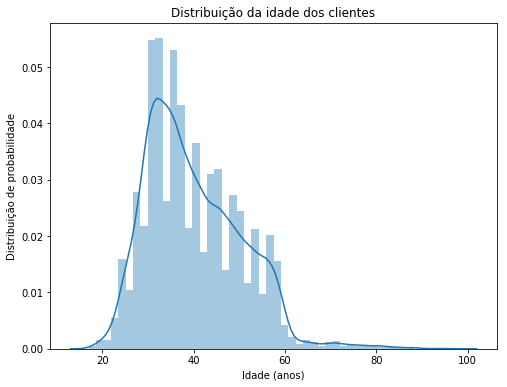

In [6]:
plt.figure(figsize=(8,6))
sns.distplot(infobank_df['age'])
plt.title('Distribuição da idade dos clientes')
plt.xlabel('Idade (anos)')
plt.ylabel('Distribuição de probabilidade')

### **Porcentagem de clientes ativos por faixa etária**

In [7]:
age_range = [17,30,50,100]
age_yes_count = infobank_df[yes].groupby(pd.cut(infobank_df['age'][yes], age_range))['y'].count()
age_yes = 100*(age_yes_count/age_yes_count.sum())
age_yes

age
(17, 30]     24.191462
(30, 50]     52.479517
(50, 100]    23.329021
Name: y, dtype: float64

### **Taxa de adesão por faixa etária**

In [8]:
age_all_count = infobank_df.groupby(pd.cut(infobank_df['age'], age_range))['y'].count()
age_ratio = 100*(age_yes_count/age_all_count)
age_ratio

age
(17, 30]     15.207373
(30, 50]      9.141784
(50, 100]    15.069638
Name: y, dtype: float64

Text(0, 0.5, 'Taxa de adesão (%)')

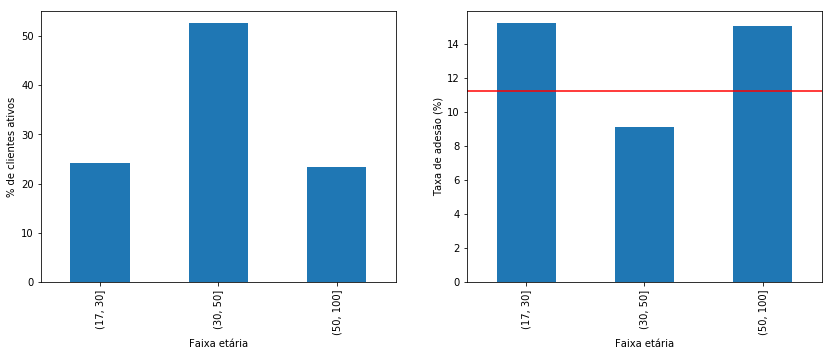

In [9]:
plt.figure(figsize=(14,5))

plt.subplot(121)
age_yes.plot.bar()
plt.xlabel('Faixa etária')
plt.ylabel('% de clientes ativos')

plt.subplot(122)
age_ratio.plot.bar()
plt.axhline(y=ratio_yes, color='r')
plt.xlabel('Faixa etária')
plt.ylabel('Taxa de adesão (%)')

## **Emprego/Ocupação**

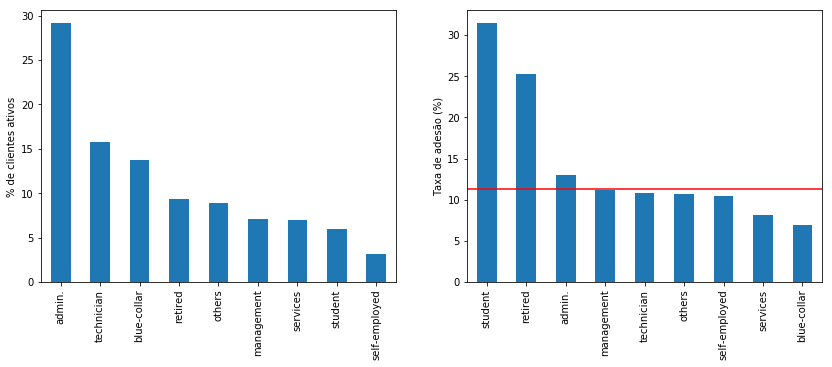

In [10]:
plt.figure(figsize=(14,5))
infobank_df = most_freq_cat(infobank_df, 'job', 'y', 'yes', lim=0.9)
taxa_adesao(infobank_df, 'job', 'y', 'yes', ratio_yes)

## **Estado civil**

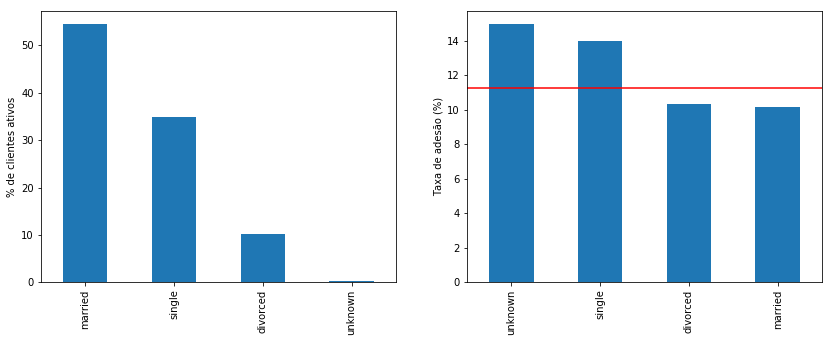

In [11]:
plt.figure(figsize=(14,5))
taxa_adesao(infobank_df, 'marital', 'y', 'yes', ratio_yes)

## **Escolaridade**

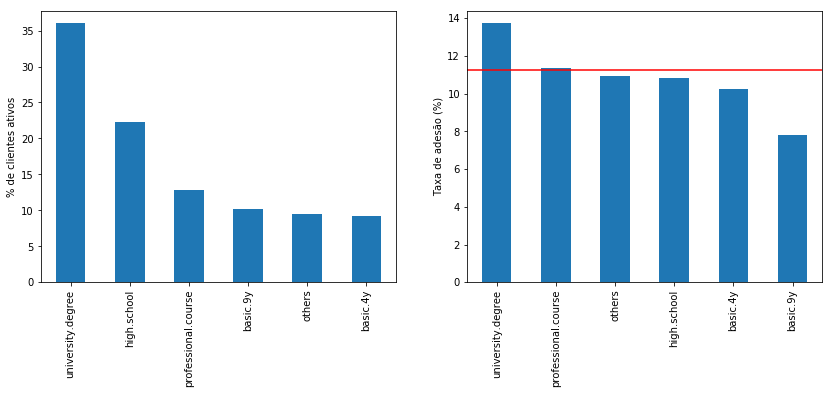

In [12]:
plt.figure(figsize=(14,5))
infobank_df = most_freq_cat(infobank_df, 'education', 'y', 'yes', lim=0.9)
taxa_adesao(infobank_df, 'education', 'y', 'yes', ratio_yes)

## **Informações econômicas dos clientes**

### **Clientes com dívidas pendentes**

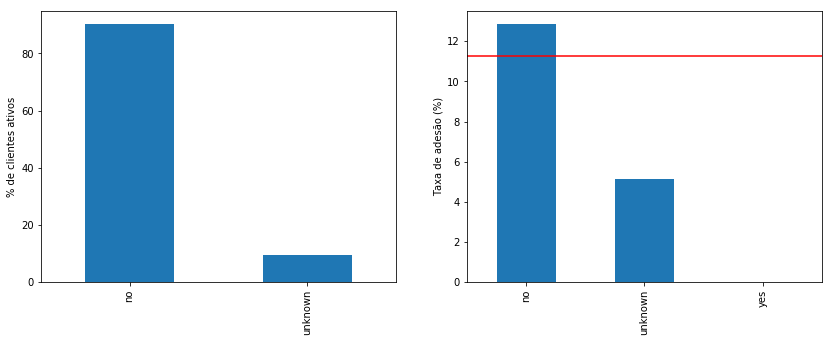

In [13]:
plt.figure(figsize=(14,5))
taxa_adesao(infobank_df, 'default', 'y', 'yes', ratio_yes)

### **Clientes com empréstimo imobiliário**

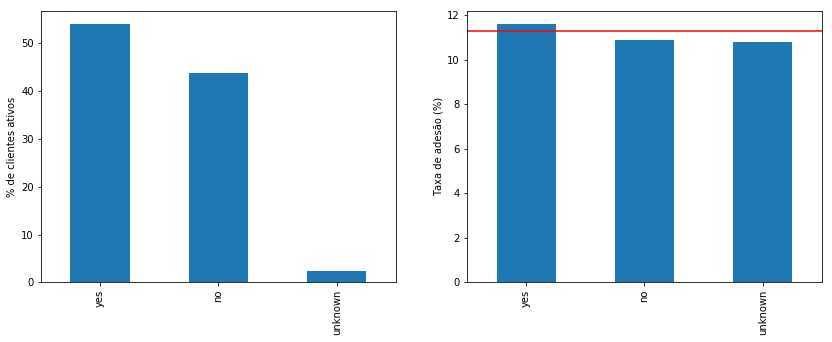

In [14]:
plt.figure(figsize=(14,5))
taxa_adesao(infobank_df, 'housing', 'y', 'yes', ratio_yes)

### **Cliente com empréstimo pessoal**

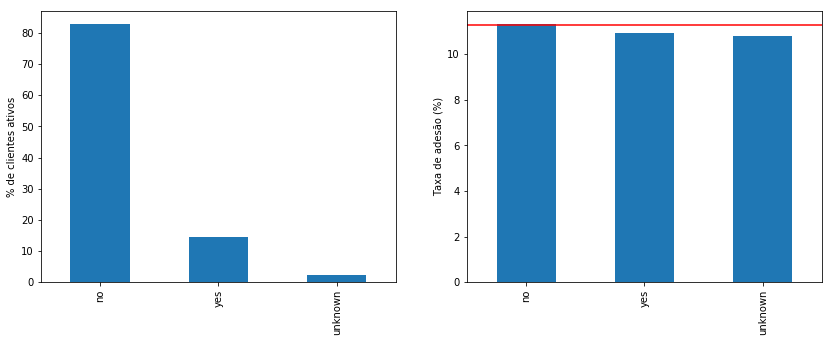

In [15]:
plt.figure(figsize=(14,5))
taxa_adesao(infobank_df, 'loan', 'y', 'yes', ratio_yes)

## **Dados da companha de marketing**

### **Número de contatos com o cliente durante a campanha**

In [16]:
numb_contact = infobank_df.groupby('y')['campaign']
numb_contact.describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,2.633085,2.873438,1.0,1.0,2.0,3.0,56.0
yes,4640.0,2.051724,1.666245,1.0,1.0,2.0,2.0,23.0


In [17]:
print('Número de contatos necessários para atingir 90% dos clientes ativos:',
      numb_contact.quantile(0.90)['yes'])

Número de contatos necessários para atingir 90% dos clientes ativos: 4.0


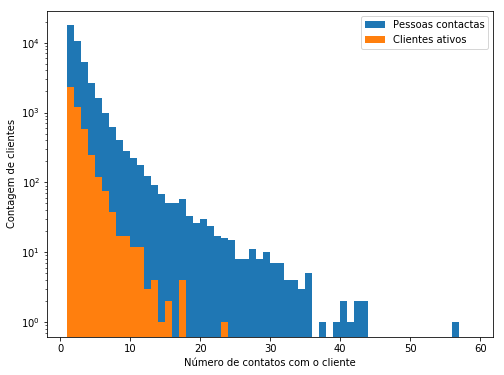

In [18]:
plt.figure(figsize=(8,6))
plt.hist(infobank_df['campaign'], bins=np.arange(1,60,1))
plt.hist(infobank_df['campaign'][yes], bins=np.arange(1,60,1))
plt.xlabel('Número de contatos com o cliente')
plt.ylabel('Contagem de clientes')
plt.yscale('log')
plt.legend(['Pessoas contactas', 'Clientes ativos'])

In [19]:
infobank_df[yes].groupby(pd.cut(infobank_df['age'][yes], age_range))['campaign'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
"(17, 30]",1122.0,2.005348,1.489172,1.0,1.0,2.0,2.0,15.0
"(30, 50]",2434.0,2.098603,1.775795,1.0,1.0,2.0,3.0,23.0
"(50, 100]",1082.0,1.995379,1.583032,1.0,1.0,1.0,2.0,17.0


Text(0.5, 1.0, '')

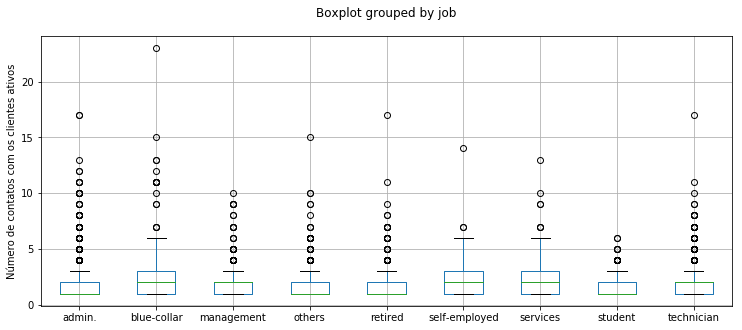

In [20]:
infobank_df[yes].boxplot(['campaign'], by=['job'], figsize=(12,5))
plt.xlabel(None)
plt.ylabel('Número de contatos com os clientes ativos')
plt.title('')

Text(0.5, 1.0, '')

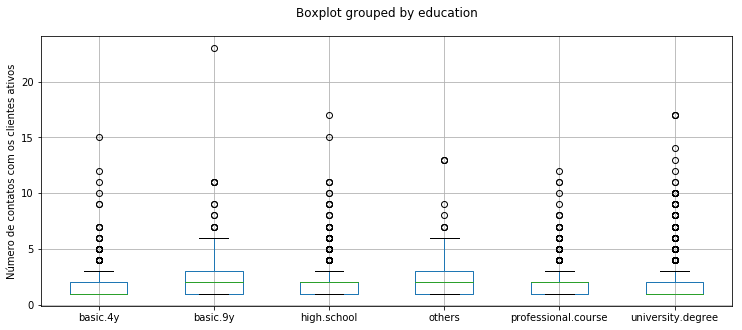

In [21]:
infobank_df[yes].boxplot(['campaign'], by=['education'], figsize=(12,5))
plt.xlabel(None)
plt.ylabel('Número de contatos com os clientes ativos')
plt.title('')

### **Tempo de duranção do último contato com o cliente**

In [22]:
time = infobank_df.groupby('y')['duration']
time.describe()/60.

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,609.133333,3.680747,3.451605,0.000000,1.583333,2.725000,4.650000,81.966667
yes,77.333333,9.219853,6.686198,0.616667,4.216667,7.483333,12.354167,69.983333


In [23]:
print('50% dos contatos mal-sucedidos se encerram em até (min):', time.quantile(0.5)['no']/60.)
print('90% dos contatos mal-sucedidos se encerram em até (min):', time.quantile(0.9)['no']/60.)

50% dos contatos mal-sucedidos se encerram em até (min): 2.725
90% dos contatos mal-sucedidos se encerram em até (min): 7.45


/home/anderson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 40)

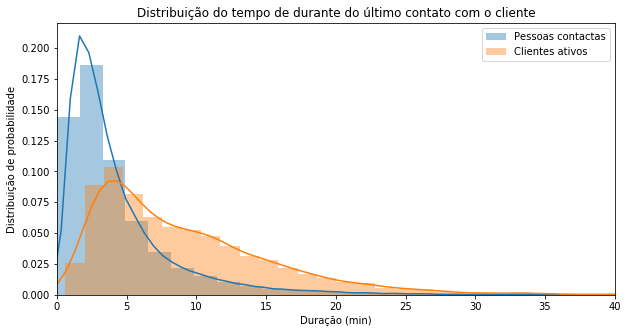

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(infobank_df['duration']/60.)
sns.distplot(infobank_df['duration'][yes]/60.)
plt.title('Distribuição do tempo de durante do último contato com o cliente')
plt.xlabel('Duração (min)')
plt.ylabel('Distribuição de probabilidade')
plt.legend(['Pessoas contactas', 'Clientes ativos'])
plt.xlim([0,40])

### **Correlação: tempo de duração vs resposta do cliente**

In [25]:
y_bin = infobank_df['y'].replace(['no', 'yes'], [0,1])
infobank_df['y_bin'] = y_bin
infobank_df.corr()['y_bin']['duration']

0.4052738006792763

### **Meio de contato com o cliente**

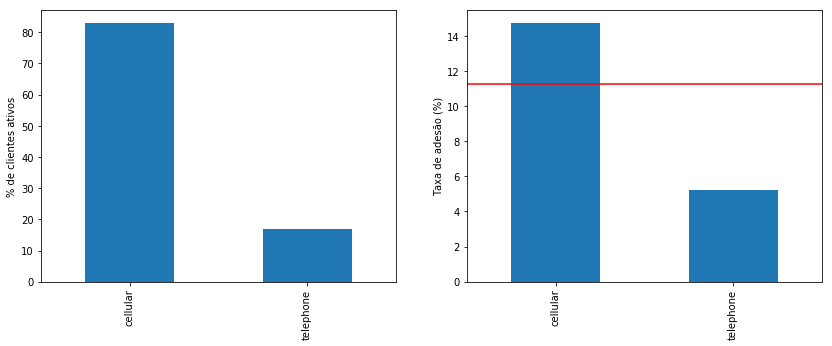

In [26]:
plt.figure(figsize=(14,5))
taxa_adesao(infobank_df, 'contact', 'y', 'yes', ratio_yes)

### **Mês do último contato**

In [49]:
infobank_df = pd.read_csv('bank-additional-full.csv', sep=';')

In [50]:
infobank_df['month'] = infobank_df['month'].replace(['mar', 'apr', 'may'], ['tri_1', 'tri_1', 'tri_1'])

infobank_df['month'] = infobank_df['month'].replace(['jun', 'jul', 'aug'], ['tri_2', 'tri_2', 'tri_2'])

infobank_df['month'] = infobank_df['month'].replace(['sep', 'oct', 'nov', 'dec'], ['tri_3', 'tri_3', 'tri_3', 'tri_3'])

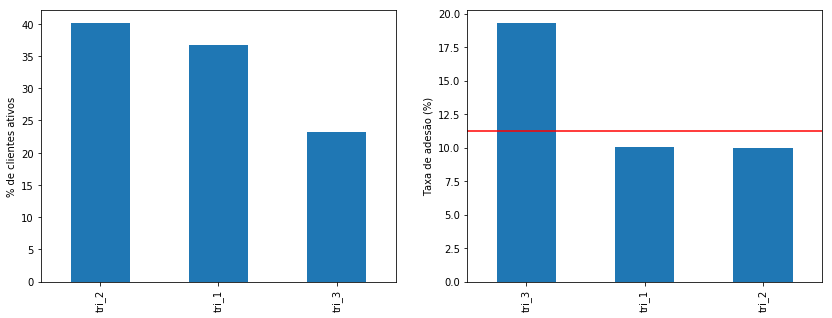

In [51]:
plt.figure(figsize=(14,5))
taxa_adesao(infobank_df, 'month', 'y', 'yes', ratio_yes)

### **Dia da semana do último contato**

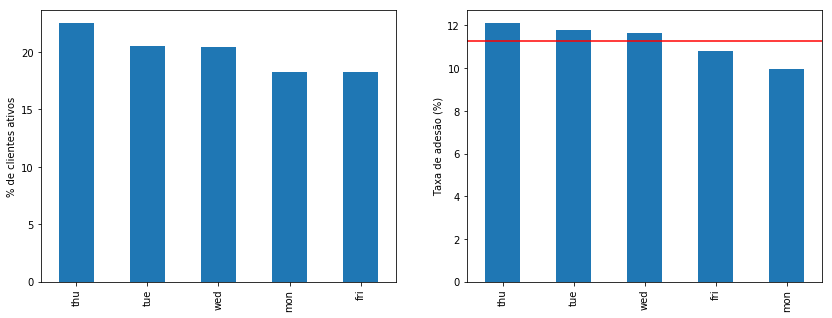

In [28]:
plt.figure(figsize=(14,5))
taxa_adesao(infobank_df, 'day_of_week', 'y', 'yes', ratio_yes)

## **Contexto socioeconômico**

### **Taxa de variação trimestral de emprego**

/home/anderson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


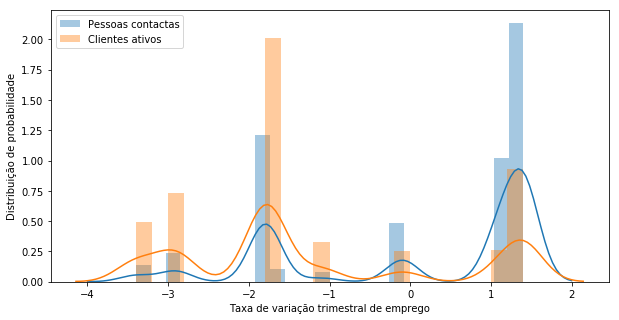

In [29]:
plot_num_cat(infobank_df, 'emp.var.rate', 'y', 'yes', xlabel='Taxa de variação trimestral de emprego')

### **Índices de preço ao consumidor**

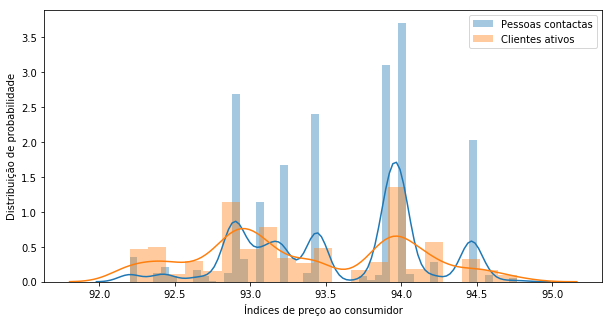

In [30]:
plot_num_cat(infobank_df, 'cons.price.idx', 'y', 'yes', xlabel='Índices de preço ao consumidor')

### **Índice de confiança do consumidor**

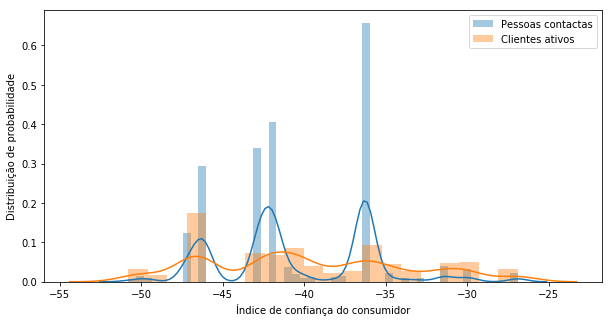

In [31]:
plot_num_cat(infobank_df, 'cons.conf.idx', 'y', 'yes', xlabel='Índice de confiança do consumidor')

### **Índice Euribor**

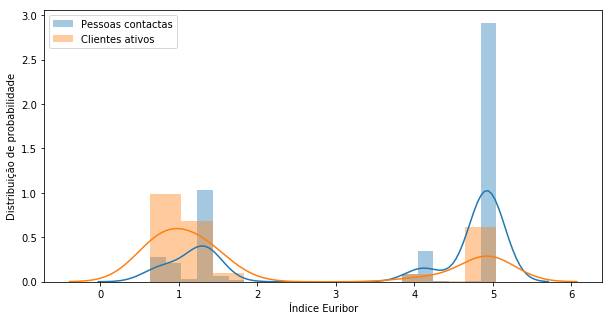

In [32]:
plot_num_cat(infobank_df, 'euribor3m', 'y', 'yes', xlabel='Índice Euribor')

### **Número de empregados**

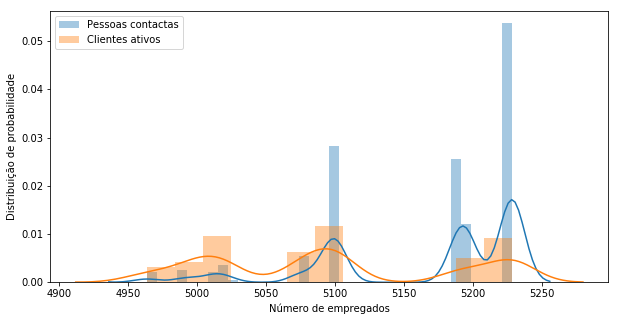

In [33]:
plot_num_cat(infobank_df, 'nr.employed', 'y', 'yes', xlabel='Número de empregados')

## **Dados da campanha atual**

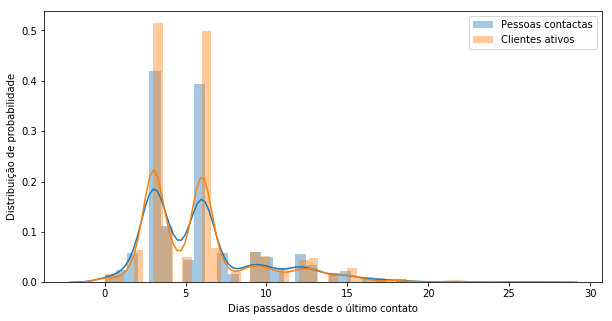

In [34]:
ii = infobank_df['pdays'] != 999
plot_num_cat(infobank_df[ii], 'pdays', 'y', 'yes', xlabel='Dias passados desde o último contato')

In [35]:
ii = infobank_df['pdays'] == 999
jj = (infobank_df['pdays'] == 999) & yes

ratio_never_cont = 100*len(infobank_df[jj])/len(infobank_df[ii])
print('Taxa de adesão dos clientes que nunca foram contactados anteriormente: %.2f%%' % ratio_never_cont)

Taxa de adesão dos clientes que nunca foram contactados anteriormente: 9.26%


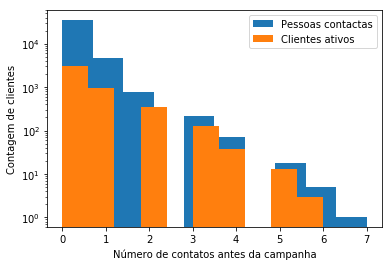

In [36]:
plt.hist(infobank_df['previous'])
plt.hist(infobank_df['previous'][yes])
plt.xlabel('Número de contatos antes da campanha')
plt.ylabel('Contagem de clientes')
plt.yscale('log')
plt.legend(['Pessoas contactas', 'Clientes ativos'])

### **Resultado da campanha anterior**

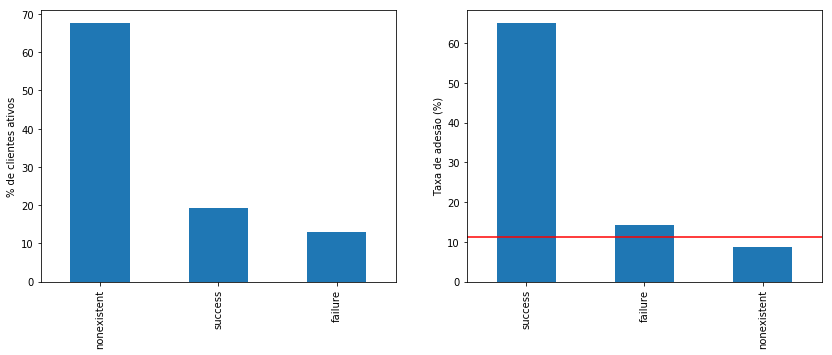

In [37]:
plt.figure(figsize=(14,5))
taxa_adesao(infobank_df, 'poutcome', 'y', 'yes', ratio_yes)

## **Retorno financeiro**

### **Retorno líquido por pessoa contacta**
> Ligando para todas as pessoas do banco de dados

In [38]:
retorno_liq = np.zeros(len(infobank_df))
retorno_liq[yes] = 120

ii_cel = infobank_df['contact'] == 'cellular'
retorno_liq[ii_cel] -= 0.8*infobank_df['campaign'][ii_cel]*infobank_df['duration'][ii_cel]/60.

ii_tel = infobank_df['contact'] == 'telephone'
retorno_liq[ii_tel] -= 0.6*infobank_df['campaign'][ii_tel]*infobank_df['duration'][ii_tel]/60.

retorno_liq = retorno_liq.sum()/len(infobank_df)
print("Retorno líquido por pessoa: R$ %.2f" % retorno_liq)

Retorno líquido por pessoa: R$ 6.16


### **Retorno líquido por pessoa contacta**
> Ligando somente para todas as pessoas que comprarão o produto (caso ideal)

In [39]:
retorno_liq = np.zeros(len(infobank_df))
retorno_liq[yes] = 120

ii_cel = (infobank_df['contact'] == 'cellular') & yes
retorno_liq[ii_cel] -= 0.8*infobank_df['campaign'][ii_cel]*infobank_df['duration'][ii_cel]/60.

ii_tel = (infobank_df['contact'] == 'telephone') & yes
retorno_liq[ii_tel] -= 0.6*infobank_df['campaign'][ii_tel]*infobank_df['duration'][ii_tel]/60.

retorno_liq = retorno_liq.sum()/len(infobank_df[yes])
print("Retorno líquido por pessoa: R$ %.2f" % retorno_liq)

Retorno líquido por pessoa: R$ 104.55
